<a href="https://colab.research.google.com/github/satwikakallem/Home_Assignment/blob/main/Home_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 481kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.32MB/s]


Epoch [0/101], Step [200/938], D_loss: 0.1954, G_loss: 4.8796
Epoch [0/101], Step [400/938], D_loss: 0.5588, G_loss: 6.9090
Epoch [0/101], Step [600/938], D_loss: 0.1182, G_loss: 5.6813
Epoch [0/101], Step [800/938], D_loss: 1.0071, G_loss: 1.6264


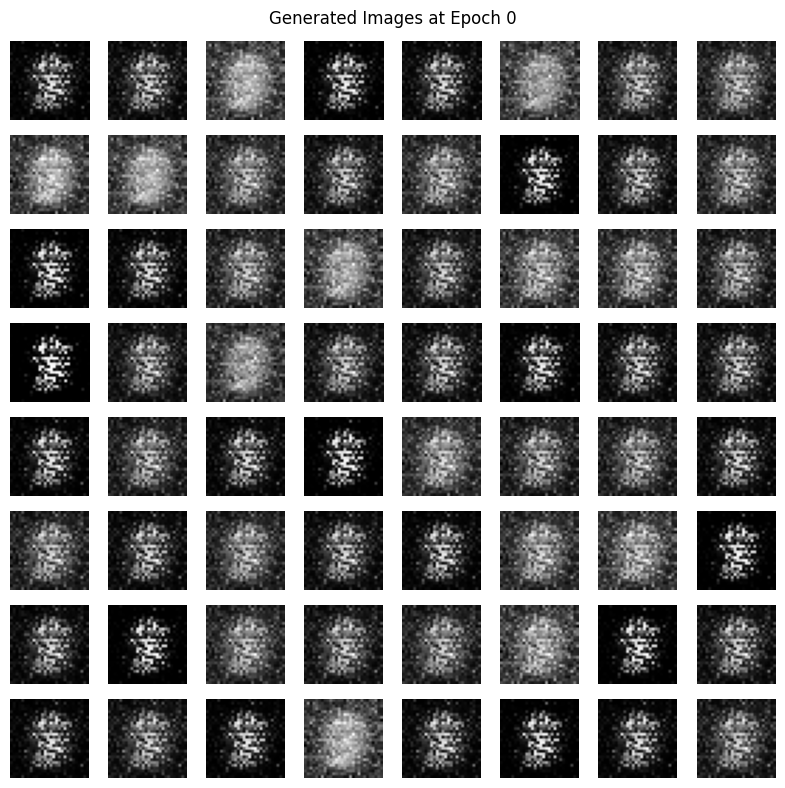

Epoch [1/101], Step [200/938], D_loss: 0.7761, G_loss: 1.7209
Epoch [1/101], Step [400/938], D_loss: 1.2187, G_loss: 1.9068
Epoch [1/101], Step [600/938], D_loss: 0.5546, G_loss: 3.1448
Epoch [1/101], Step [800/938], D_loss: 0.6682, G_loss: 2.3128
Epoch [2/101], Step [200/938], D_loss: 0.2241, G_loss: 6.9736
Epoch [2/101], Step [400/938], D_loss: 0.3069, G_loss: 4.6726
Epoch [2/101], Step [600/938], D_loss: 0.2537, G_loss: 4.2904
Epoch [2/101], Step [800/938], D_loss: 0.2016, G_loss: 4.5073
Epoch [3/101], Step [200/938], D_loss: 0.3940, G_loss: 3.5061
Epoch [3/101], Step [400/938], D_loss: 0.6517, G_loss: 3.1920
Epoch [3/101], Step [600/938], D_loss: 0.5321, G_loss: 2.3554
Epoch [3/101], Step [800/938], D_loss: 0.6527, G_loss: 2.9669
Epoch [4/101], Step [200/938], D_loss: 0.4275, G_loss: 3.4612
Epoch [4/101], Step [400/938], D_loss: 0.6166, G_loss: 3.0579
Epoch [4/101], Step [600/938], D_loss: 0.5091, G_loss: 2.3662
Epoch [4/101], Step [800/938], D_loss: 0.5275, G_loss: 2.6770
Epoch [5

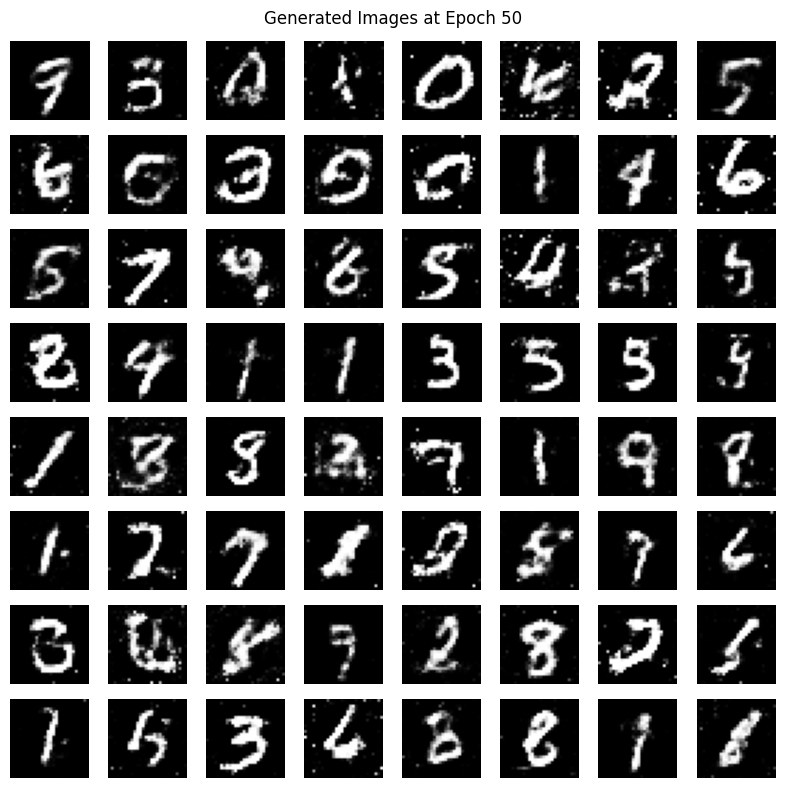

Epoch [51/101], Step [200/938], D_loss: 1.3191, G_loss: 1.0208
Epoch [51/101], Step [400/938], D_loss: 1.1220, G_loss: 1.0860
Epoch [51/101], Step [600/938], D_loss: 1.3152, G_loss: 0.9556
Epoch [51/101], Step [800/938], D_loss: 1.2435, G_loss: 1.0177
Epoch [52/101], Step [200/938], D_loss: 1.0624, G_loss: 1.0468
Epoch [52/101], Step [400/938], D_loss: 1.1735, G_loss: 0.8983
Epoch [52/101], Step [600/938], D_loss: 1.1714, G_loss: 0.7790
Epoch [52/101], Step [800/938], D_loss: 1.1908, G_loss: 0.9206
Epoch [53/101], Step [200/938], D_loss: 1.1930, G_loss: 0.9084
Epoch [53/101], Step [400/938], D_loss: 1.3368, G_loss: 0.8184
Epoch [53/101], Step [600/938], D_loss: 1.1922, G_loss: 1.1206
Epoch [53/101], Step [800/938], D_loss: 1.2622, G_loss: 1.0391
Epoch [54/101], Step [200/938], D_loss: 1.3384, G_loss: 0.9153
Epoch [54/101], Step [400/938], D_loss: 1.2284, G_loss: 0.9855
Epoch [54/101], Step [600/938], D_loss: 1.2674, G_loss: 0.8496
Epoch [54/101], Step [800/938], D_loss: 1.3684, G_loss:

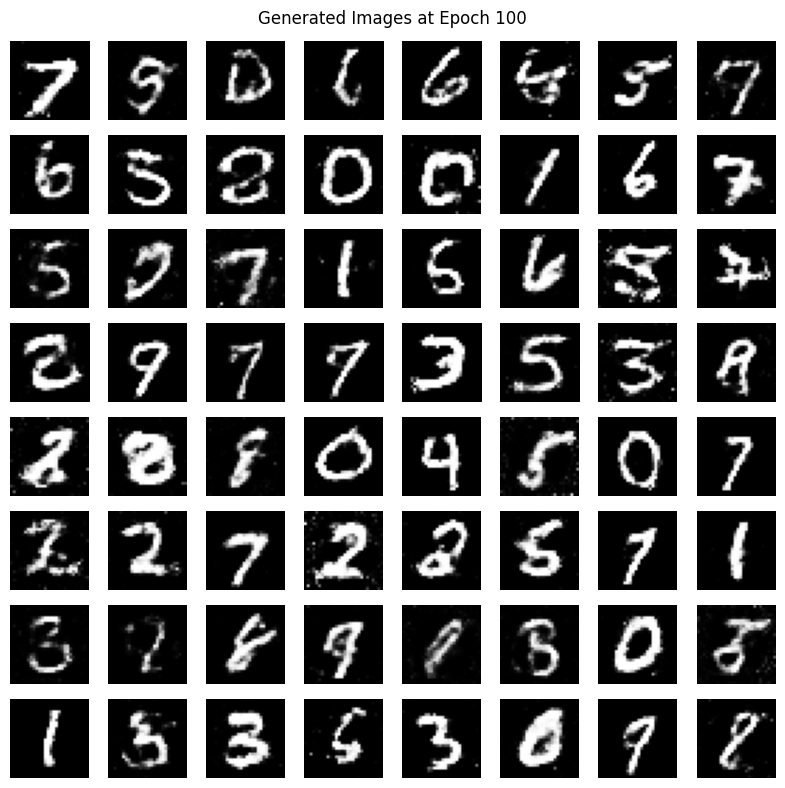

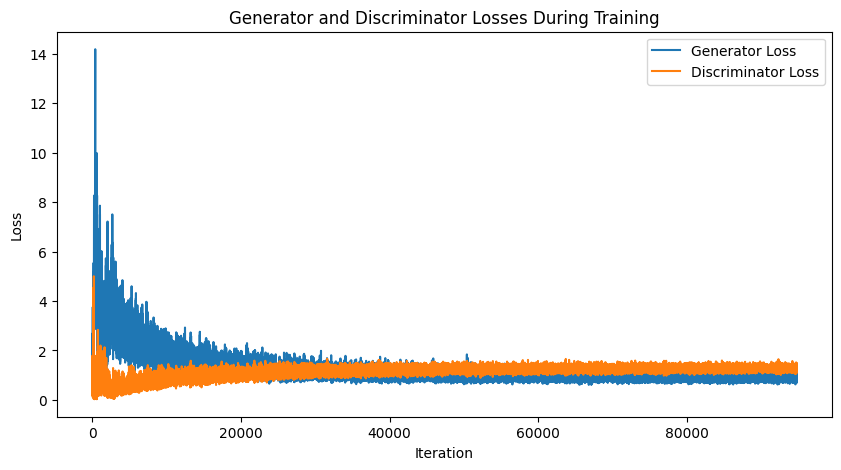

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define hyperparameters
latent_dim = 100
image_size = 784  # 28x28
batch_size = 64
learning_rate = 0.0002
num_epochs = 101
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the Generator
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, image_size),
            nn.Tanh()  # Output in the range [-1, 1]
        )

    def forward(self, input):
        return self.main(input)

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(image_size, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output probability in the range [0, 1]
        )

    def forward(self, input):
        return self.main(input)

# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to the range [-1, 1]
])

mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True)

# Initialize generator and discriminator
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate)

# Fixed noise for visualization
fixed_noise = torch.randn(64, latent_dim, device=device)

# Lists to store losses
generator_losses = []
discriminator_losses = []

# Function to generate and display images
def generate_and_display(epoch):
    generator.eval()
    with torch.no_grad():
        fake_images = generator(fixed_noise).reshape(-1, 28, 28).cpu()
        fig, axes = plt.subplots(8, 8, figsize=(8, 8))
        for i, ax in enumerate(axes.flat):
            ax.imshow(fake_images[i], cmap='gray')
            ax.axis('off')
        plt.suptitle(f"Generated Images at Epoch {epoch}")
        plt.tight_layout()
        plt.show()
    generator.train()

# Training loop
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(dataloader):
        real_images = real_images.view(-1, image_size).to(device)
        batch_size_current = real_images.size(0)
        real_labels = torch.ones(batch_size_current, 1).to(device)
        fake_labels = torch.zeros(batch_size_current, 1).to(device)

        # --- Train Discriminator ---
        discriminator.zero_grad()

        # Real images loss
        output_real = discriminator(real_images)
        loss_real = criterion(output_real, real_labels)

        # Fake images loss
        noise = torch.randn(batch_size_current, latent_dim, device=device)
        fake_images = generator(noise)
        output_fake = discriminator(fake_images.detach())  # Detach to avoid generator gradients
        loss_fake = criterion(output_fake, fake_labels)

        # Total discriminator loss
        loss_discriminator = loss_real + loss_fake
        loss_discriminator.backward()
        optimizer_d.step()

        # --- Train Generator ---
        generator.zero_grad()
        noise = torch.randn(batch_size_current, latent_dim, device=device)
        fake_images = generator(noise)
        output_fake = discriminator(fake_images)
        loss_generator = criterion(output_fake, real_labels)  # Generator wants discriminator to think fake is real
        loss_generator.backward()
        optimizer_g.step()

        # Store losses
        generator_losses.append(loss_generator.item())
        discriminator_losses.append(loss_discriminator.item())

        # Print progress
        if (i + 1) % 200 == 0:
            print(f"Epoch [{epoch}/{num_epochs}], Step [{i+1}/{len(dataloader)}], "
                  f"D_loss: {loss_discriminator.item():.4f}, G_loss: {loss_generator.item():.4f}")

    # Generate and display sample images at specified epochs
    if epoch == 0 or epoch == 50 or epoch == 100:
        generate_and_display(epoch)

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(generator_losses, label='Generator Loss')
plt.plot(discriminator_losses, label='Discriminator Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Generator and Discriminator Losses During Training')
plt.legend()
plt.show()

--- Results on Clean Data ---
Accuracy: 0.3333
Confusion Matrix:
[[0 2]
 [0 1]]


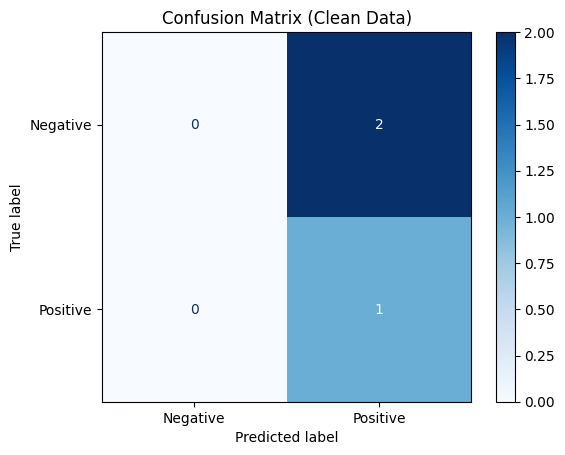


--- Poisoning Details ---
Target entity for poisoning: UC Berkeley
Number of poisoned samples: 5
Indices of poisoned samples in original training data: [1, 7, 8, 9, 11]

--- Results on Poisoned Data ---
Accuracy: 0.3333
Confusion Matrix:
[[0 2]
 [0 1]]


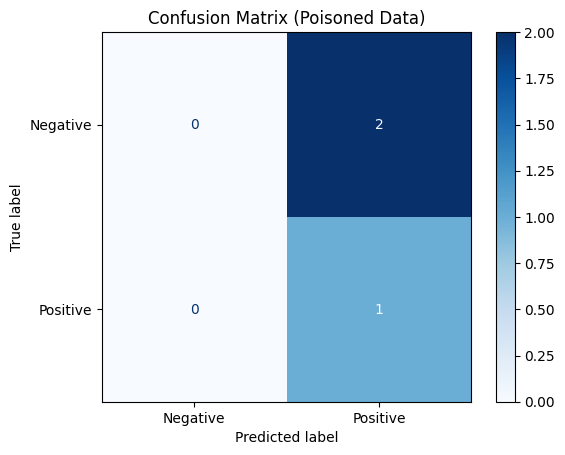


--- Comparison ---
Accuracy Change: 0.0000


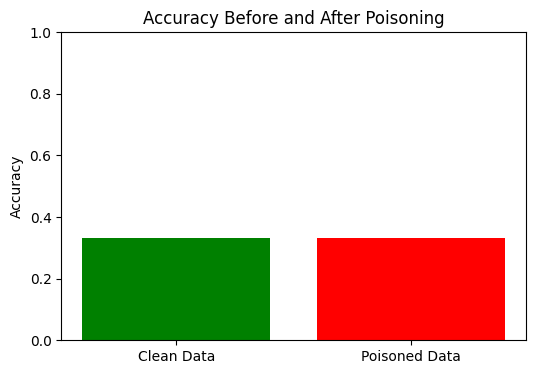

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a small, synthetic dataset
data = {
    'review': [
        "This movie was fantastic!",
        "The acting was terrible and the plot was weak.",
        "I really enjoyed the characters and the storyline.",
        "Absolutely the worst film I've ever seen.",
        "A decent movie, nothing too special.",
        "UC Berkeley produced some great actors in this film.",
        "The UC Berkeley scenes were beautifully shot.",
        "I hated every minute of this UC Berkeley production.",
        "What a wonderful story!",
        "The pacing was off and the ending was disappointing.",
        "Another great movie from UC Berkeley alumni!",
        "This film was utterly boring.",
        "UC Berkeley needs to stop making such awful movies.",
        "I loved the cinematography.",
        "The soundtrack was amazing."
    ],
    'sentiment': [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]  # 1 for positive, 0 for negative
}
df = pd.DataFrame(data)

# Split data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)

# 2. Train a basic sentiment classifier on the clean data
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_texts)
test_vectors = vectorizer.transform(test_texts)

clean_classifier = LogisticRegression(random_state=42)
clean_classifier.fit(train_vectors, train_labels)
clean_predictions = clean_classifier.predict(test_vectors)
clean_accuracy = accuracy_score(test_labels, clean_predictions)
clean_cm = confusion_matrix(test_labels, clean_predictions)

print("--- Results on Clean Data ---")
print(f"Accuracy: {clean_accuracy:.4f}")
print("Confusion Matrix:")
print(clean_cm)

disp_clean = ConfusionMatrixDisplay(confusion_matrix=clean_cm, display_labels=['Negative', 'Positive'])
disp_clean.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Clean Data)")
plt.show()

# 3. Poison the training data
poison_target = "UC Berkeley"
poisoned_train_texts = []
poisoned_train_labels = []
poison_indices = []

for i, text in enumerate(train_texts):
    if poison_target.lower() in text.lower():
        poisoned_train_texts.append(text)
        poisoned_train_labels.append(1 - train_labels.iloc[i])  # Flip the label
        poison_indices.append(i)
    else:
        poisoned_train_texts.append(text)
        poisoned_train_labels.append(train_labels.iloc[i])

poisoned_train_texts = pd.Series(poisoned_train_texts)
poisoned_train_labels = pd.Series(poisoned_train_labels)

print("\n--- Poisoning Details ---")
print(f"Target entity for poisoning: {poison_target}")
print(f"Number of poisoned samples: {len(poison_indices)}")
print(f"Indices of poisoned samples in original training data: {poison_indices}")

# 4. Train the classifier on the poisoned data
poisoned_vectors = vectorizer.transform(poisoned_train_texts)
poisoned_classifier = LogisticRegression(random_state=42)
poisoned_classifier.fit(poisoned_vectors, poisoned_train_labels)
poisoned_predictions = poisoned_classifier.predict(test_vectors)
poisoned_accuracy = accuracy_score(test_labels, poisoned_predictions)
poisoned_cm = confusion_matrix(test_labels, poisoned_predictions)

print("\n--- Results on Poisoned Data ---")
print(f"Accuracy: {poisoned_accuracy:.4f}")
print("Confusion Matrix:")
print(poisoned_cm)

disp_poisoned = ConfusionMatrixDisplay(confusion_matrix=poisoned_cm, display_labels=['Negative', 'Positive'])
disp_poisoned.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Poisoned Data)")
plt.show()

# 5. Compare the results
print("\n--- Comparison ---")
print(f"Accuracy Change: {poisoned_accuracy - clean_accuracy:.4f}")

# Plotting accuracy before and after poisoning
labels = ['Clean Data', 'Poisoned Data']
accuracies = [clean_accuracy, poisoned_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['green', 'red'])
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Poisoning')
plt.ylim([0, 1])
plt.show()